In [67]:
import numpy as np
import pandas as pd
from IPython.display import Markdown as md
import matplotlib.pyplot as plt
import seaborn as sns

In [68]:
%%html
<style>
    table {display: inline-block}
</style>

In [69]:
monthly_kw = pd.read_csv('Residential_Average_Monthly_kWh_and_Bills.csv')
monthly_kw.info()

#
# Treating the set as a population, assuming this is based on the universe of Austin Energy residential customers

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 231 entries, 0 to 230
Data columns (total 4 columns):
Date                       231 non-null object
Average kWh                231 non-null int64
Fuel Charge (Cents/kWh)    231 non-null float64
Average Bill               231 non-null float64
dtypes: float64(2), int64(1), object(1)
memory usage: 7.3+ KB


In [70]:
monthly_kw.head()

,Date,Average kWh,Fuel Charge (Cents/kWh),Average Bill
0,03/01/2019 12:00:00 AM,658,2.895,65.13
1,02/01/2019 12:00:00 AM,707,2.895,70.38
2,01/01/2019 12:00:00 AM,761,2.895,76.13
3,12/01/2018 12:00:00 AM,663,2.895,65.67
4,11/01/2018 12:00:00 AM,685,2.895,68.01


In [71]:
# Measures of central tendency
# Average kWh
mean_kWh = monthly_kw['Average kWh'].mean()
median_kWh = monthly_kw['Average kWh'].median()
mode_kWh = monthly_kw['Average kWh'].mode()
variance_kWh = monthly_kw['Average kWh'].var()
std_dev_kWh = monthly_kw['Average kWh'].std()

# Average Fuel Charge
mean_fuel_charge = monthly_kw['Fuel Charge (Cents/kWh)'].mean()
median_fuel_charge = monthly_kw['Fuel Charge (Cents/kWh)'].median()
mode_fuel_charge = monthly_kw['Fuel Charge (Cents/kWh)'].mode()
variance_fuel_charge = monthly_kw['Fuel Charge (Cents/kWh)'].var()
std_dev_fuel_charge = monthly_kw['Fuel Charge (Cents/kWh)'].std()

# Average Bill
mean_average_bill = monthly_kw['Average Bill'].mean()
median_average_bill = monthly_kw['Average Bill'].median()
mode_average_bill = monthly_kw['Average Bill'].mode()
variance_average_bill = monthly_kw['Average Bill'].var()
std_dev_average_bill = monthly_kw['Average Bill'].std()

md(f"""
<p>
    <table>
        <tr>
            <th></th>
            <th>Average kWh</th>
            <th>Fuel Charge</th>
            <th>Average Bill</th>
        </tr>
        <tr>
            <td>Mean</td>
            <td>{mean_kWh}</td>
            <td>{mean_fuel_charge}</td>
            <td>{mean_average_bill}</td>
        </tr>
        <tr>
            <td>Median</td>
            <td>{median_kWh}</td>
            <td>{median_fuel_charge}</td>
            <td>{median_average_bill}</td>
        </tr>
        <tr>
            <td>Mode</td>
            <td>{mode_kWh}</td>
            <td>{mode_fuel_charge}</td>
            <td>{mode_average_bill}</td>
        </tr>
        <tr>
            <td>Variance</td>
            <td>{variance_kWh}</td>
            <td>{variance_fuel_charge}</td>
            <td>{variance_average_bill}</td>
        </tr>
        <tr>
            <td>StDev</td>
            <td>{std_dev_kWh}</td>
            <td>{std_dev_fuel_charge}</td>
            <td>{std_dev_average_bill}</td>
        </tr>
    </table>
</p>
""")


<p>
    <table>
        <tr>
            <th></th>
            <th>Average kWh</th>
            <th>Fuel Charge</th>
            <th>Average Bill</th>
        </tr>
        <tr>
            <td>Mean</td>
            <td>940.5670995670996</td>
            <td>3.0321774891774993</td>
            <td>88.31099567099564</td>
        </tr>
        <tr>
            <td>Median</td>
            <td>858.0</td>
            <td>3.105</td>
            <td>75.52</td>
        </tr>
        <tr>
            <td>Mode</td>
            <td>0    663
1    707
2    708
3    732
4    762
dtype: int64</td>
            <td>0    3.653
dtype: float64</td>
            <td>0     54.26
1     58.62
2     65.13
3    113.95
dtype: float64</td>
        </tr>
        <tr>
            <td>Variance</td>
            <td>69578.90743459444</td>
            <td>0.4562481553171464</td>
            <td>1058.4220681347638</td>
        </tr>
        <tr>
            <td>StDev</td>
            <td>263.77814055488835</td>
            <td>0.675461438808424</td>
            <td>32.53339927113003</td>
        </tr>
    </table>
</p>


In [72]:
# Measures of Dispersion
min_average_kWh = monthly_kw['Average kWh'].min()
max_average_kWh = monthly_kw['Average kWh'].max()
range_average_kWh = max_average_kWh-min_average_kWh

min_fuel_charge = monthly_kw['Fuel Charge (Cents/kWh)'].min()
max_fuel_charge = monthly_kw['Fuel Charge (Cents/kWh)'].max()
range_fuel_charge = max_fuel_charge-min_fuel_charge

min_average_bill = monthly_kw['Average Bill'].min()
max_average_bill = monthly_kw['Average Bill'].max()
range_average_bill = max_average_bill-min_average_bill

quartile_dict = monthly_kw.quantile([0.25,0.5,0.75]).to_dict()
iqr_average_kWh = quartile_dict['Average kWh'][0.75] - quartile_dict['Average kWh'][0.25]
iqr_fuel_charge = quartile_dict['Fuel Charge (Cents/kWh)'][0.75] - quartile_dict['Fuel Charge (Cents/kWh)'][0.25]
iqr_average_bill = quartile_dict['Average Bill'][0.75] - quartile_dict['Average Bill'][0.25]

md(f"""
<p>
    <table>
        <tr>
            <th></th>
            <th>Average kWh</th>
            <th>Fuel Charge</th>
            <th>Average Bill</th>
        </tr>
        <tr>
            <td>Min Value</td>
            <td>{min_average_kWh}</td>
            <td>{min_fuel_charge}</td>
            <td>{min_average_bill}</td>
        </tr>
        <tr>
            <td>Max Value</td>
            <td>{max_average_kWh}</td>
            <td>{max_fuel_charge}</td>
            <td>{max_average_bill}</td>
        </tr>
        <tr>
            <td>Range</td>
            <td>{range_average_kWh}</td>
            <td>{range_fuel_charge}</td>
            <td>{range_average_bill}</td>
        </tr>
        <tr>
            <td>Q<sub>1</sub>, 25%</td>
            <td>{quartile_dict['Average kWh'][0.25]}</td>
            <td>{quartile_dict['Fuel Charge (Cents/kWh)'][0.25]}</td>
            <td>{quartile_dict['Average Bill'][0.25]}</td>
        </tr>
        <tr>
            <td>Q<sub>2, 50%</sub></td>
            <td>{quartile_dict['Average kWh'][0.50]}</td>
            <td>{quartile_dict['Fuel Charge (Cents/kWh)'][0.50]}</td>
            <td>{quartile_dict['Average Bill'][0.50]}</td>
        </tr>
        <tr>
            <td>Q<sub>3, 75%</sub></td>
            <td>{quartile_dict['Average kWh'][0.75]}</td>
            <td>{quartile_dict['Fuel Charge (Cents/kWh)'][0.75]}</td>
            <td>{quartile_dict['Average Bill'][0.75]}</td>
        </tr>
        <tr>
            <td>IQR</td>
            <td>{iqr_average_kWh}</td>
            <td>{iqr_fuel_charge}</td>
            <td>{iqr_average_bill}</td>
        </tr>
        <tr>
            <td>Fence Min</td>
            <td>{quartile_dict['Average kWh'][0.25] - (iqr_average_kWh*1.5)}</td>
            <td>{quartile_dict['Fuel Charge (Cents/kWh)'][0.25] - (iqr_fuel_charge*1.5)}</td>
            <td>{quartile_dict['Average Bill'][0.25] - (iqr_average_bill*1.5)}</td>
        </tr>
        <tr>
            <td>Fence Max</td>
            <td>{quartile_dict['Average kWh'][0.75] + (iqr_average_kWh*1.5)}</td>
            <td>{quartile_dict['Fuel Charge (Cents/kWh)'][0.75] + (iqr_fuel_charge*1.5)}</td>
            <td>{quartile_dict['Average Bill'][0.75] + (iqr_average_bill*1.5)}</td>
        </tr>
    </table>
</p>
""")


<p>
    <table>
        <tr>
            <th></th>
            <th>Average kWh</th>
            <th>Fuel Charge</th>
            <th>Average Bill</th>
        </tr>
        <tr>
            <td>Min Value</td>
            <td>600</td>
            <td>1.3719999999999999</td>
            <td>43.77</td>
        </tr>
        <tr>
            <td>Max Value</td>
            <td>1565</td>
            <td>3.945</td>
            <td>172.65</td>
        </tr>
        <tr>
            <td>Range</td>
            <td>965</td>
            <td>2.573</td>
            <td>128.88</td>
        </tr>
        <tr>
            <td>Q<sub>1</sub>, 25%</td>
            <td>715.0</td>
            <td>2.783</td>
            <td>61.894999999999996</td>
        </tr>
        <tr>
            <td>Q<sub>2, 50%</sub></td>
            <td>858.0</td>
            <td>3.105</td>
            <td>75.52</td>
        </tr>
        <tr>
            <td>Q<sub>3, 75%</sub></td>
            <td>1175.0</td>
            <td>3.653</td>
            <td>114.11</td>
        </tr>
        <tr>
            <td>IQR</td>
            <td>460.0</td>
            <td>0.8700000000000001</td>
            <td>52.215</td>
        </tr>
        <tr>
            <td>Fence Min</td>
            <td>25.0</td>
            <td>1.4779999999999998</td>
            <td>-16.42750000000001</td>
        </tr>
        <tr>
            <td>Fence Max</td>
            <td>1865.0</td>
            <td>4.958</td>
            <td>192.4325</td>
        </tr>
    </table>
</p>


In [73]:
monthly_kw.describe()

,Average kWh,Fuel Charge (Cents/kWh),Average Bill
count,231.000000,231.000000,231.000000
mean,940.567100,3.032177,88.310996
std,263.778141,0.675461,32.533399
min,600.000000,1.372000,43.770000
25%,715.000000,2.783000,61.895000
50%,858.000000,3.105000,75.520000
75%,1175.000000,3.653000,114.110000
max,1565.000000,3.945000,172.650000


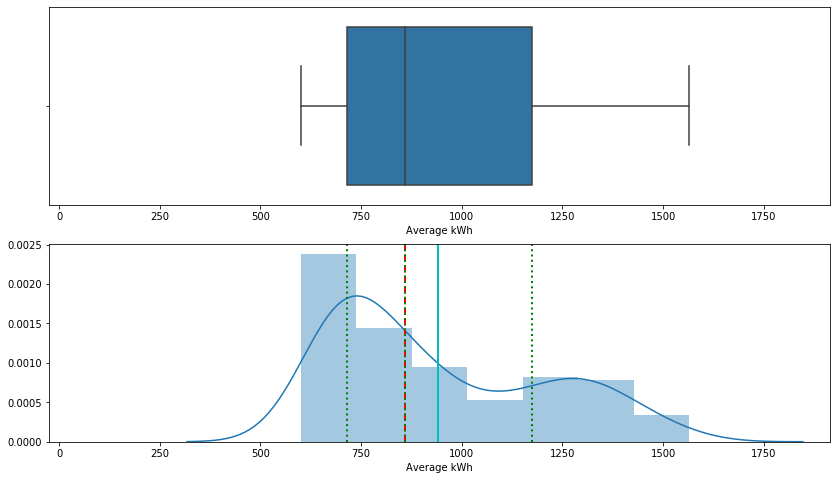

In [74]:
fig, axs = plt.subplots(nrows=2)
fig.set_size_inches(14,8)

plot1 = sns.boxplot(monthly_kw['Average kWh'], ax=axs[0])
plot1.set(xlim=((quartile_dict['Average kWh'][0.25] - (iqr_average_kWh*1.5)-50), 
                (quartile_dict['Average kWh'][0.75] + (iqr_average_kWh*1.5)+50)))

plot2 = sns.distplot(monthly_kw['Average kWh'], ax=axs[1])
plot2.set(xlim=((quartile_dict['Average kWh'][0.25] - (iqr_average_kWh*1.5)-50), 
                (quartile_dict['Average kWh'][0.75] + (iqr_average_kWh*1.5)+50)))

plt.axvline(median_kWh, color='r', linestyle='dashed', linewidth=2)
plt.axvline(mean_kWh, color='c', linestyle='solid', linewidth=2)
for i,q in enumerate(monthly_kw['Average kWh'].quantile([0.25,0.5,0.75])):
    plt.axvline(q, color='g', linestyle='dotted', linewidth=2)

plt.show()

In [ ]:
quartile_dict = monthly_kw.quantile([0.25,0.5,0.75]).to_dict()
# Create a stat block for each column in the dataframe
# ? Is there a pandas method for determining the Range for a column or series 
#     Possibility: avg_kWh_range = np.ptp(monthly_kw['Average kWh'].to_numpy(),axis=0)
#     Reference: pandas.to_numpy() & https://docs.scipy.org/doc/numpy/reference/generated/numpy.ptp.html
avg_kWh = dict(mean=monthly_kw['Average kWh'].mean(), 
               median=monthly_kw['Average kWh'].median(), 
               mode=monthly_kw['Average kWh'].mode(), 
               variance=monthly_kw['Average kWh'].var(), 
               st_dev=monthly_kw['Average kWh'].std(), 
               min=monthly_kw['Average kWh'].min(), 
               max=monthly_kw['Average kWh'].max(), 
               range=(monthly_kw['Average kWh'].max()-monthly_kw['Average kWh'].min()), 
               q1=quartile_dict['Average kWh'][0.25], 
               q2=quartile_dict['Average kWh'][0.50], 
               q3=quartile_dict['Average kWh'][0.75], 
               iqr=(quartile_dict['Average kWh'][0.75]-quartile_dict['Average kWh'][0.25]), 
               min_fence=(quartile_dict['Average kWh'][0.25] - 
                          ((quartile_dict['Average kWh'][0.75] - quartile_dict['Average kWh'][0.25])*1.5)), 
               max_fence=(quartile_dict['Average kWh'][0.75] + 
                          ((quartile_dict['Average kWh'][0.75] - quartile_dict['Average kWh'][0.25])*1.5)))

fuel_charge = dict(mean=monthly_kw['Fuel Charge (Cents/kWh)'].mean(), 
               median=monthly_kw['Fuel Charge (Cents/kWh)'].median(), 
               mode=monthly_kw['Fuel Charge (Cents/kWh)'].mode(), 
               variance=monthly_kw['Fuel Charge (Cents/kWh)'].var(), 
               st_dev=monthly_kw['Fuel Charge (Cents/kWh)'].std(), 
               min=monthly_kw['Fuel Charge (Cents/kWh)'].min(), 
               max=monthly_kw['Fuel Charge (Cents/kWh)'].max(), 
               range=(monthly_kw['Fuel Charge (Cents/kWh)'].max()-monthly_kw['Fuel Charge (Cents/kWh)'].min()), 
               q1=quartile_dict['Fuel Charge (Cents/kWh)'][0.25], 
               q2=quartile_dict['Fuel Charge (Cents/kWh)'][0.50], 
               q3=quartile_dict['Fuel Charge (Cents/kWh)'][0.75], 
               iqr=(quartile_dict['Fuel Charge (Cents/kWh)'][0.75]-quartile_dict['Fuel Charge (Cents/kWh)'][0.25]), 
               min_fence=(quartile_dict['Fuel Charge (Cents/kWh)'][0.25] - 
                          ((quartile_dict['Fuel Charge (Cents/kWh)'][0.75] - 
                            quartile_dict['Fuel Charge (Cents/kWh)'][0.25])*1.5)), 
               max_fence=(quartile_dict['Fuel Charge (Cents/kWh)'][0.75] + 
                          ((quartile_dict['Fuel Charge (Cents/kWh)'][0.75] - 
                            quartile_dict['Fuel Charge (Cents/kWh)'][0.25])*1.5)))

fuel_charge = dict(mean=monthly_kw['Average Bill'].mean(), 
               median=monthly_kw['Average Bill'].median(), 
               mode=monthly_kw['Average Bill'].mode(), 
               variance=monthly_kw['Average Bill'].var(), 
               st_dev=monthly_kw['Average Bill'].std(), 
               min=monthly_kw['Average Bill'].min(), 
               max=monthly_kw['Average Bill'].max(), 
               range=(monthly_kw['Average Bill'].max()-monthly_kw['Average Bill'].min()), 
               q1=quartile_dict['Average Bill'][0.25], 
               q2=quartile_dict['Average Bill'][0.50], 
               q3=quartile_dict['Average Bill'][0.75], 
               iqr=(quartile_dict['Average Bill'][0.75]-quartile_dict['Average Bill'][0.25]), 
               min_fence=(quartile_dict['Average Bill'][0.25] - 
                          ((quartile_dict['Average Bill'][0.75] - quartile_dict['Average Bill'][0.25])*1.5)), 
               max_fence=(quartile_dict['Average Bill'][0.75] + 
                          ((quartile_dict['Average Bill'][0.75] - quartile_dict['Average Bill'][0.25])*1.5)))

In [86]:
avg_kWh['range']

965

In [85]:
avg_kWh_range = np.ptp(monthly_kw['Average kWh'].to_numpy(),axis=0)
avg_kWh_range

965